<font size=10> (Loan Data from Prosper) </font>
## by (Yaman Al Jaghbir)

# 0.0 Preliminary Wrangling

"This data set contains 113,937 loans with 81 variables on each 
loan, including loan amount, borrower rate (or interest rate), 
current loan status, borrower income, and many others."

## 0.1 Import Libraries

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## 0.2 Loading Data and Preliminary Cleaning

In [2]:
prosper_raw_df = pd.read_csv("prosperLoanData.csv")

In [3]:
prosper_raw_df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [4]:
prosper_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

After checking carefully the [Variable Definitions](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) for the features/columns, I found there is a difference in the features that being reconsidered "before 2009" and "on and after 2009".

As I am intending to use "ProsperRating" and "ProsperScore" in my exploration, and they are only available for the after 2009 data I will remove all records that don't have them. (84853 / 113936 = 74.5%) of the records are kept.

In [5]:
#Dropping records that don't have ProsperScore
prosper_raw_df.dropna(axis=0,subset=["ProsperScore"],inplace = True)

ListingKey, ListingNumber, LoanKey are all supposed to be unique identifier.
If we check them out:

In [6]:
#If all records have a unique number we should get 0.
# any other number indicate the number of repeated values
len(prosper_raw_df) - prosper_raw_df.ListingKey.nunique()

871

We have 871 repeated records.

if all three variables gave the same number of unique values, then the repeated records are the same for all of them.

In [7]:
print(prosper_raw_df.ListingKey.nunique() == prosper_raw_df.ListingNumber.nunique() == prosper_raw_df.LoanKey.nunique())

True


True means the repeated records are the same on all varaibles.

In [8]:
print(prosper_raw_df.ListingKey.nunique(), " of ", len(prosper_raw_df), " are unique")

83982  of  84853  are unique


In [9]:
#droping the repeated records. I will keep the last record.
prosper_raw_df.drop_duplicates(subset=["ListingKey"], keep='last', inplace=True)

In [10]:
#check
len(prosper_raw_df) - prosper_raw_df.ListingKey.nunique()

0

In [11]:
## 0.3 Exploring Questions to Decide on Features

### What is the structure of your dataset?

The data size is 113937 rows by 81 columns.
I will not be exploring all the features as there are many of them. My exploration will be limited to 10 features, that at least have two categorical and two numeric features.

Explanation of the data in each column/variable can be found [here (Google Sheet File)](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)


### What is/are the main feature(s) of interest in your dataset?

I am interested in to know what features affect the "Loan Status". To predict which loans will be completed or defaulted. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will be looking on these features (ordered by appearance):
 
>1.  Term
2.  LoanStatus
3.  BorrowerAPR
5.  ProsperRating (Alpha)
6.  EmploymentStatus
7.  EmploymentStatusDuration
8.  IsBorrowerHomeowner
9.  DebtToIncomeRatio
10. IncomeRange
11. LoanOriginalAmount

I didn't consider CreditScore or ProsperScore though they might be important because they are covered in the ProsperRating. According to their website [(link)](https://www.prosper.com/invest/how-to-invest/prosper-ratings/?mod=article_inline):
"The estimated base loss rate is determined by two scores: (1) the borrower's credit score, obtained from an official credit reporting agency, and (2) the Prosper Score, figured in-house based on the Prosper population."
The base loss rate determines the ProsperRating

| Prosper Rating | Estimated Avg. Annual Loss Rate |
|:--------------:|:---------------------------------:|
| AA            | 0.00-1.99%                        |
| A             | 2.00–3.99%                        |
| B             | 4.00–5.99%                        |
| C             | 6.00–8.99%                        |
| D             | 9.00–11.99%                       |
| E             | 12.00–14.99%                      |
| HR            | ≥ 15.00%                          |


## 0.4 Preparding Dataframe for Exploring

### Subset Data

In [12]:
# createing the dataframe with the features that will be use 
prosper_df = prosper_raw_df.loc[:,[
    'LoanStatus',
    'BorrowerAPR',
    'ProsperRating (Alpha)',
    'LoanOriginalAmount',
    'Term',
    'IsBorrowerHomeowner',
    'EmploymentStatus',
    'EmploymentStatusDuration',
    'DebtToIncomeRatio',
    'IncomeRange',
]]

In [13]:
prosper_df.rename(columns = {'ProsperRating (Alpha)':'ProsperRating'},inplace=True)

In [14]:
prosper_df.head()

,LoanStatus,BorrowerAPR,ProsperRating,LoanOriginalAmount,Term,IsBorrowerHomeowner,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IncomeRange
1,Current,0.12016,A,10000,36,False,Employed,44.0,0.18,"$50,000-74,999"
3,Current,0.12528,A,10000,36,True,Employed,113.0,0.15,"$25,000-49,999"
4,Current,0.24614,D,15000,36,True,Employed,44.0,0.26,"$100,000+"
5,Current,0.15425,B,15000,60,True,Employed,82.0,0.36,"$100,000+"
6,Current,0.31032,E,3000,36,False,Employed,172.0,0.27,"$25,000-49,999"


In [15]:
prosper_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 1 to 113936
Data columns (total 10 columns):
LoanStatus                  83982 non-null object
BorrowerAPR                 83982 non-null float64
ProsperRating               83982 non-null object
LoanOriginalAmount          83982 non-null int64
Term                        83982 non-null int64
IsBorrowerHomeowner         83982 non-null bool
EmploymentStatus            83982 non-null object
EmploymentStatusDuration    83963 non-null float64
DebtToIncomeRatio           76768 non-null float64
IncomeRange                 83982 non-null object
dtypes: bool(1), float64(3), int64(2), object(4)
memory usage: 6.5+ MB


### Prepare Feature: LoanStatus

As my main objective from this exploration is to predict the Loan Status, will it Default or be completed I will need to rearrange the status as following:
- Past Due: All past due incident will be grouped under this title
- Defaulted: Under it will be Chargedoff and Defaulted
- Completed: Under it will have Completed and FinalPaymentInProgress
- To remove: Current as it doesn't help in my exploration.



In [16]:
#removing records with "Current" LoanStatus
filt = prosper_df['LoanStatus'] != 'Current' 
prosper_df = prosper_df[filt] 

In [17]:
prosper_df.replace(['Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)',
                    'Past Due (91-120 days)','Past Due (>120 days)'],'PastDue',inplace=True)

In [18]:
prosper_df.replace(['Chargedoff'],'Defaulted',inplace=True)

In [19]:
prosper_df.replace(['FinalPaymentInProgress'],'Completed',inplace=True)

In [20]:
loan_classes = ['Completed','Defaulted', 'PastDue']
loan_cat =  pd.api.types.CategoricalDtype(ordered=True, categories = loan_classes)
prosper_df['LoanStatus'] = prosper_df['LoanStatus'].astype(loan_cat)

In [21]:
prosper_df.LoanStatus.value_counts()

Completed    19854
Defaulted     6341
PastDue       2057
Name: LoanStatus, dtype: int64

### Prepare Feature: IncomeRange

Income Range text is long and can be summarized to fit better on the axis.
Also it should be order as it is ordinal.

In [22]:
# Exploring the values
prosper_df.IncomeRange.value_counts()

$25,000-49,999    9056
$50,000-74,999    8001
$75,000-99,999    4356
$100,000+         4287
$1-24,999         2117
Not employed       401
$0                  34
Name: IncomeRange, dtype: int64

In [23]:
#Renaming with short names
prosper_df.IncomeRange.replace({
    '$0':'undisclosed',
    '$1-24,999':'$0-25k',
    '$25,000-49,999':'$25-50k',
    '$50,000-74,999':'$50-75k',
    '$75,000-99,999':'$75-100k',
    '$100,000+':'>$100k'
}, inplace=True)

In [24]:
#Check
prosper_df.IncomeRange.value_counts()

$25-50k         9056
$50-75k         8001
$75-100k        4356
>$100k          4287
$0-25k          2117
Not employed     401
undisclosed       34
Name: IncomeRange, dtype: int64

In [25]:
#Applying Order
incomeRange_order = ['$0-25k','$25-50k','$50-75k','$75-100k','>$100k','Not employed','undisclosed']
incomeRange_cat =  pd.api.types.CategoricalDtype(ordered=True, categories = incomeRange_order)
prosper_df['IncomeRange'] = prosper_df['IncomeRange'].astype(incomeRange_cat)

### Prepare Feature: ProsperRating

In [26]:
prosper_df.ProsperRating.unique()

array(['B', 'HR', 'D', 'E', 'A', 'AA', 'C'], dtype=object)

We will plot the standard aphapbital rating. Will redefine the column type as an ordered category, and will be arranged from worst (HR: High Risk) to the highest (AA the safest), this is to in same order as numbered prosper rating from 1 to 7.

In [27]:
#creating ordered categoty type for ProsperRating
prosperRating_order = ['HR','E','D','C','B','A','AA']
prosperRating_cat =  pd.api.types.CategoricalDtype(ordered=True, categories = prosperRating_order)

In [28]:
prosper_df['ProsperRating'] = prosper_df['ProsperRating'].astype(prosperRating_cat)

### Prepare Feature: EmploymentStatus

In [29]:
#Exporing EmploymentStatus categories
prosper_df.EmploymentStatus.value_counts()

Employed         18359
Full-time         6611
Self-employed     1451
Other              923
Not employed       401
Retired            275
Part-time          232
Name: EmploymentStatus, dtype: int64

I don't think there is a the difference between Full-Time and Employed. I will  assume they are the same and I will merge them together.

In [30]:
#Cahnging all Full-Time status to Employed status
prosper_df.EmploymentStatus.replace('Full-time', 'Employed',inplace=True)

In [31]:
employmentstatus_order = ['Employed','Part-time','Self-employed','Retired','Not employed','Other']
employmentstatus_cat =  pd.api.types.CategoricalDtype(ordered=True, categories = employmentstatus_order)
prosper_df['EmploymentStatus'] = prosper_df['EmploymentStatus'].astype(employmentstatus_cat)

## 0.5 Code Preparation: Function and Variables Definition

Defining functions, variables and standards that will be use frequently.


In [32]:
# I will setup a function that will be used frequntly to show percentage
# above countplots bars.

def show_annot(col,df = prosper_df,displacement = -250, font_color='w' ):
    '''
    show percentage annotation above the bars on a countplot graph
    col: column name

    '''
    # The code below is taken from Udacity.
    # add annotations
    n_points = df.shape[0]
    cat_counts = df[col].value_counts()
    locs, labels = plt.xticks() # get the current tick locations and labels

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = cat_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)

        # print the annotation just below the top of the bar
        plt.text(loc, count+displacement, pct_string, ha = 'center', color = font_color)   

In [33]:
def summary(cat_var1,cat_var2,df = prosper_df):
    '''
    rearranged the count data into 2d matrix that can be used with seaborn heatmap
    Code Source: Udacity
    '''
    ct_counts = df.groupby([cat_var1, cat_var2]).size()
    ct_counts = ct_counts.reset_index(name = 'count')
    ct_counts = ct_counts.pivot(index = cat_var2, columns = cat_var1, values = 'count')
    return ct_counts

In [34]:
# This function set figure size quickly
def fsize(a,b):
    plt.figure(figsize=(a,b))

In [35]:
plt.rcParams['figure.figsize'] = (10.0, 5.0) #set default figure size

In [36]:
#base_color varaible will be used in several to set the color of the grapgh
base_color = sb.color_palette()[0]

_______________________

# 1.0 Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

## 1.1 LoanStatus

We will start at plotting the distribution, as a frequency bars, for the main dependent variable I am investigating, Loan Status.

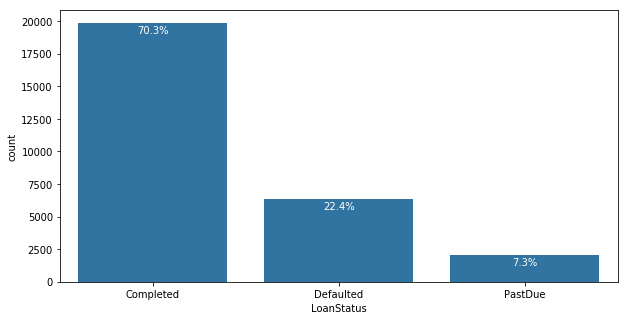

In [37]:
# create the plot
sb.countplot(data = prosper_df, x = 'LoanStatus',color=base_color)

show_annot('LoanStatus',displacement = -800)

Most of the loans are Completed,
Around quarter is Defaulted.
I am treating PastDue as potential to default loans.

## 1.2 BorrowerAPR

Next will check what I consider the most important dependent variable, though its effect will be analysed as part of this analysis, the **BorrowerAPR**.
A histogram will be used.

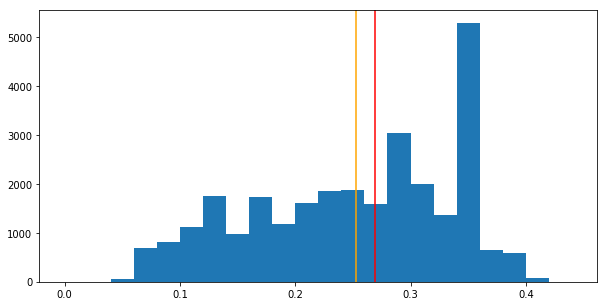

In [38]:
bin_edges = np.arange(0, prosper_df.BorrowerAPR.max()+0.02, 0.02)
plt.hist(prosper_df.BorrowerAPR,bins=bin_edges)
#show median line
plt.axvline(x=prosper_df.BorrowerAPR.median(), color = 'red')
#show mean line
plt.axvline(x=prosper_df.BorrowerAPR.mean(), color = 'orange');

The distribution is left skewed, where the median is around 0.265.
The is a big spike between 0.34 and 0.36 that I will explore further.

(0.34, 0.37)

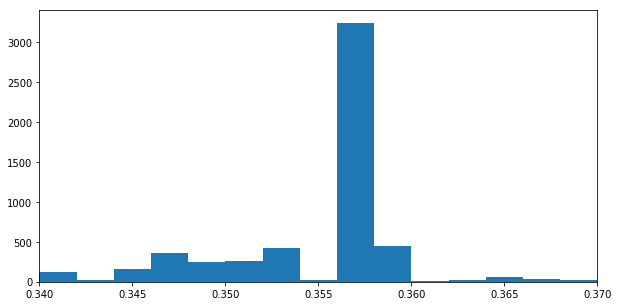

In [39]:
bin_edges = np.arange(0, prosper_df.BorrowerAPR.max()+0.002, 0.002)
plt.hist(prosper_df.BorrowerAPR,bins=bin_edges)
plt.xlim(0.34,0.37)

By zooming in we can see the spike is for rates 35.60% to 35.80%.

## 1.3 ProsperRating

Next will plot **Prosper Rating**.

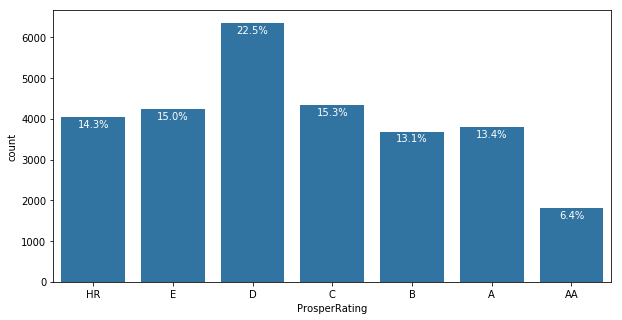

In [40]:
# create the plot
sb.countplot(data = prosper_df, x = 'ProsperRating',color=base_color)
show_annot('ProsperRating', displacement = -250)

population seems to be distributed evenly between all rates, all nearly around 14% except for D and AA.
Rate D has the most population, while AA as expected has the less population.

## 1.4 Loan Original Amount

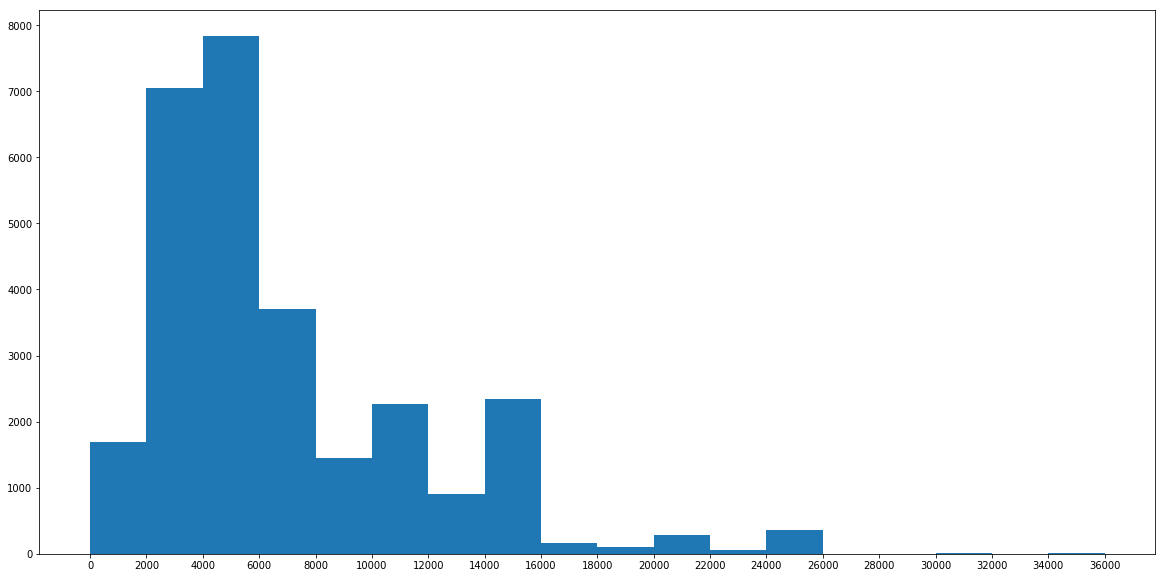

In [41]:
fsize(20,10)

bin_edges = np.arange(0, prosper_df.LoanOriginalAmount.max()+2000+.1, 2000)
plt.hist(prosper_df.LoanOriginalAmount,bins=bin_edges)
plt.xticks(np.arange(0, prosper_df.LoanOriginalAmount.max()+2000, 2000));

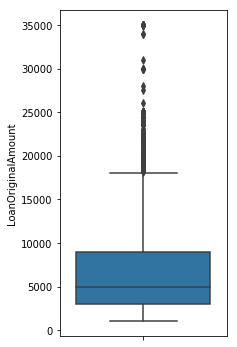

In [42]:
fsize(3,6)
sb.boxplot(data = prosper_df, y = 'LoanOriginalAmount');

The distribution is right skewed. Most of the borrowers (around 75%) are approved for loans less than \\$10,000, which I consider a small amount given that prosper can lend up to \\$40,000 ([source](https://prosper.zendesk.com/hc/en-us/articles/208500656-How-much-can-I-borrow-)).

A small number, considered outliers, that are approved for loans above \\$18,000.

## 1.5 Term, IsBorrowerHomeowner, IncomeRanges, EmploymentStatus: Subplots

Will look now at three variables and put them on subplots. The variables are: **Term, IsBorrowerHomeowner, EmploymentStatus**

I know that Term and IsBorrowerHomeowner have limited categories.
However there are several categories for EmploymentStatus.

Text(0, 0.5, 'count')

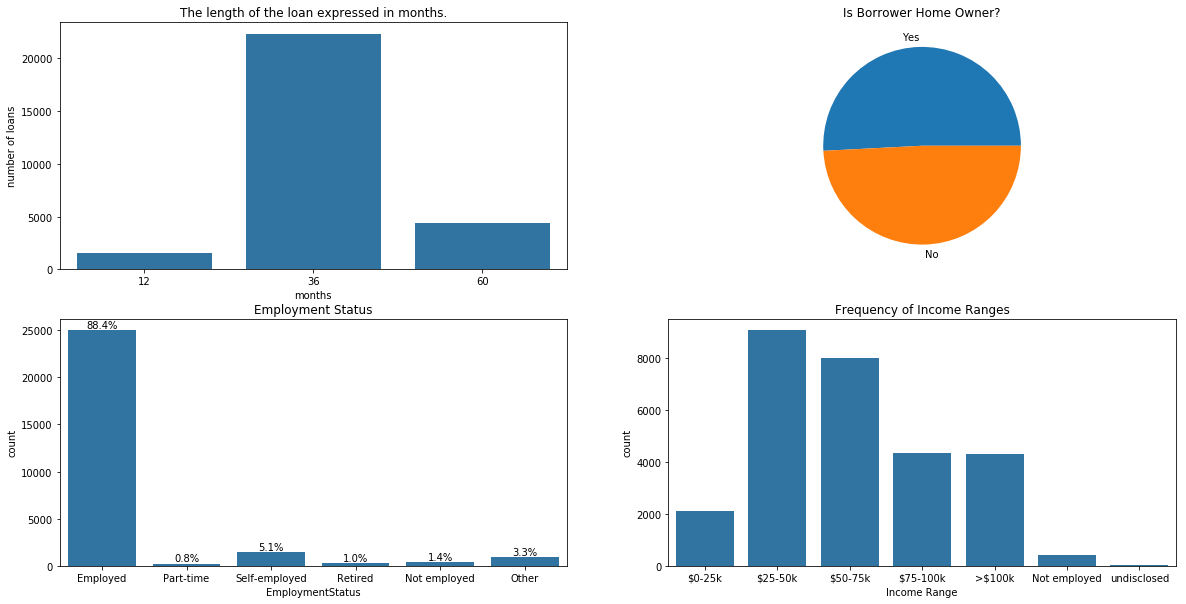

In [43]:
fsize(20,10)

plt.subplot(2, 2, 1)
sb.countplot(data = prosper_df, x = 'Term',color=base_color)
plt.title('The length of the loan expressed in months.')
plt.xlabel("months")
plt.ylabel("number of loans")

plt.subplot(2, 2, 2)
home_owners = prosper_df['IsBorrowerHomeowner'].value_counts()
plt.pie(home_owners, labels = ['Yes','No']);
plt.title('Is Borrower Home Owner?')

plt.subplot(2, 2, 3)
sb.countplot(data = prosper_df, x = 'EmploymentStatus', color=base_color);
plt.title('Employment Status')
show_annot('EmploymentStatus',font_color='black',displacement=250)

plt.subplot(2, 2, 4)
sb.countplot(data = prosper_df, x = 'IncomeRange',color=base_color, order= incomeRange_order)
plt.title('Frequency of Income Ranges')
plt.xlabel("Income Range")
plt.ylabel("count")

**Term**
Most of the borrows are going with 3 years loan, then with 5 years with big difference from 3 years. The 5 years in nearly the double of 1 year loans.

**IsBorrowerHomeowner**
The split between homeowners and non-homeowners in nearly the same, with homeowners slightly more.

**Employment Status**
As most of the borrowers are employed (88%), it doesn't seem that Employment status will be a useful indicator because not enough data present for the other type to draw conclusion.

## 1.6 Employment Status Duration

The duration is expressed in months. As there are thousands of values, I believe expressing them in years will be more useful and give a more clear picture.

In [44]:
# rounding up months to years
prosper_df.EmploymentStatusDuration = np.ceil(prosper_df.EmploymentStatusDuration/12)

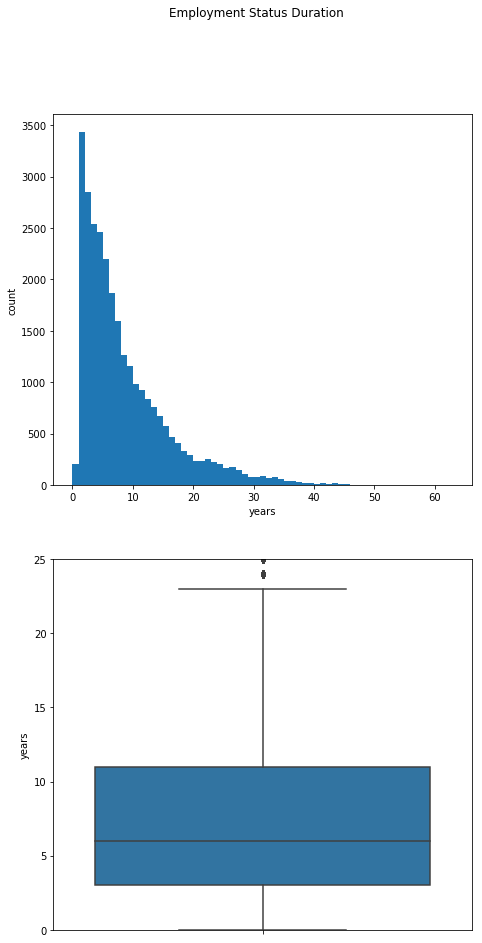

In [45]:
fsize(7.5,15)
plt.suptitle('Employment Status Duration')

#Hitsogram
plt.subplot(2,1,1)
bin_edges = np.arange(0, prosper_df.EmploymentStatusDuration.max()+0.1, 1)
plt.hist(prosper_df.EmploymentStatusDuration,bins=bin_edges)
plt.xlabel("years")
plt.ylabel("count")


#Box Plot
plt.subplot(2,1,2)
sb.boxplot(data = prosper_df, y = 'EmploymentStatusDuration')
plt.ylim(0,25)
plt.ylabel("years");

The distribution is a right skewed distribution. 
Most of the values are between 1 to 25 years, with 50% between 5-12.
Extreme outliers values at 40 years and more.

## 1.7 DebtToIncomeRatio

In [46]:
prosper_df.DebtToIncomeRatio.describe()

count    25056.000000
mean         0.251897
std          0.390738
min          0.000000
25%          0.130000
50%          0.200000
75%          0.300000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

From the statistical description given, we can assume all values above 1 are outliers.

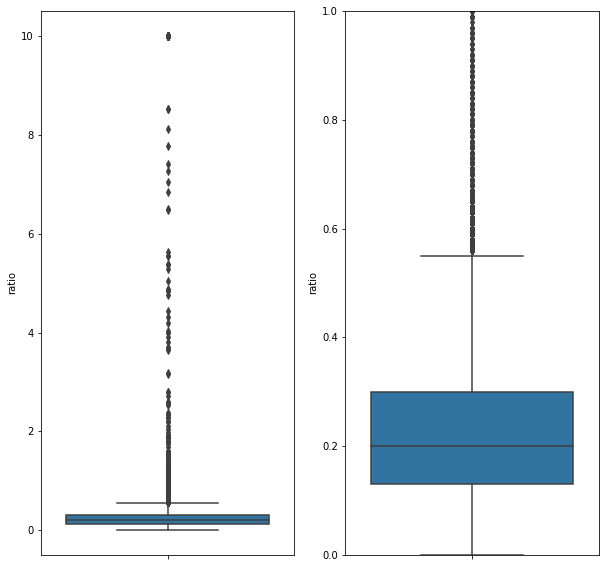

In [47]:
fsize(10,10)
plt.subplot(1,2,1)
sb.boxplot(data = prosper_df, y = 'DebtToIncomeRatio')
plt.ylabel("ratio");

plt.subplot(1,2,2)
sb.boxplot(data = prosper_df, y = 'DebtToIncomeRatio')
plt.ylim(0,1)
plt.ylabel("ratio");

From the box plot we can see that values above 1 are outliers.
I will draw a distribution for the values between 0 and 1.

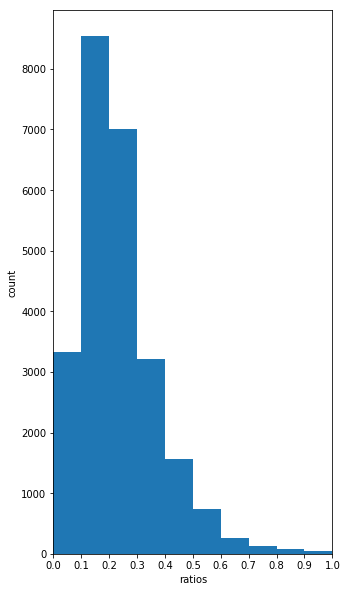

In [48]:
fsize(5,10)

#Hitsogram
bin_edges = np.arange(0, prosper_df.DebtToIncomeRatio.max()+0.1, 0.1)
plt.hist(prosper_df.DebtToIncomeRatio,bins=bin_edges)
plt.xlabel("ratios")
plt.ylabel("count")
plt.xlim(0,1) #values after 1 are outliers
plt.xticks(np.arange(0,1+0.1,0.1));

The data distribution is right skewed. Where most of the ratios between 0.1 to 0.3.

## 1.8 Summary of Univariate Exploration

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of LoanStatus is as expected. Most of the borrowers Completed (good loans) their loans (70%). The remaining is between Defaulted (bad loans) and PastDue (risk to go bad).

> There were many categories in the main data source, I had to group them to fewer categories especially that the definition of the categories was similar.

> I also removed the "Current" loan status, as it is still going and won't benefit in the analysis.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> - BorrowerAPR: There was a spike in the frequency that didn't follow the distribution. I explored it more by zooming on it through changing xlim and bin sizes. I decided to keep the data.
- EmploymentStatusDuration: I changed the data from months to years as it was difficult to construct a pattern using month, and it is easier to consider working experience by years. The distribution was right skewed with long tail. Duration above 25 years seems extreme, I decided to limit my data to 25 years.
- DebitToIncome: There many outliers values. Values above 1 seems unreasonable, and the data for this variable was limited to the range between 0 to 1.

___________________

# 2.0 Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## 2.1 General Look 

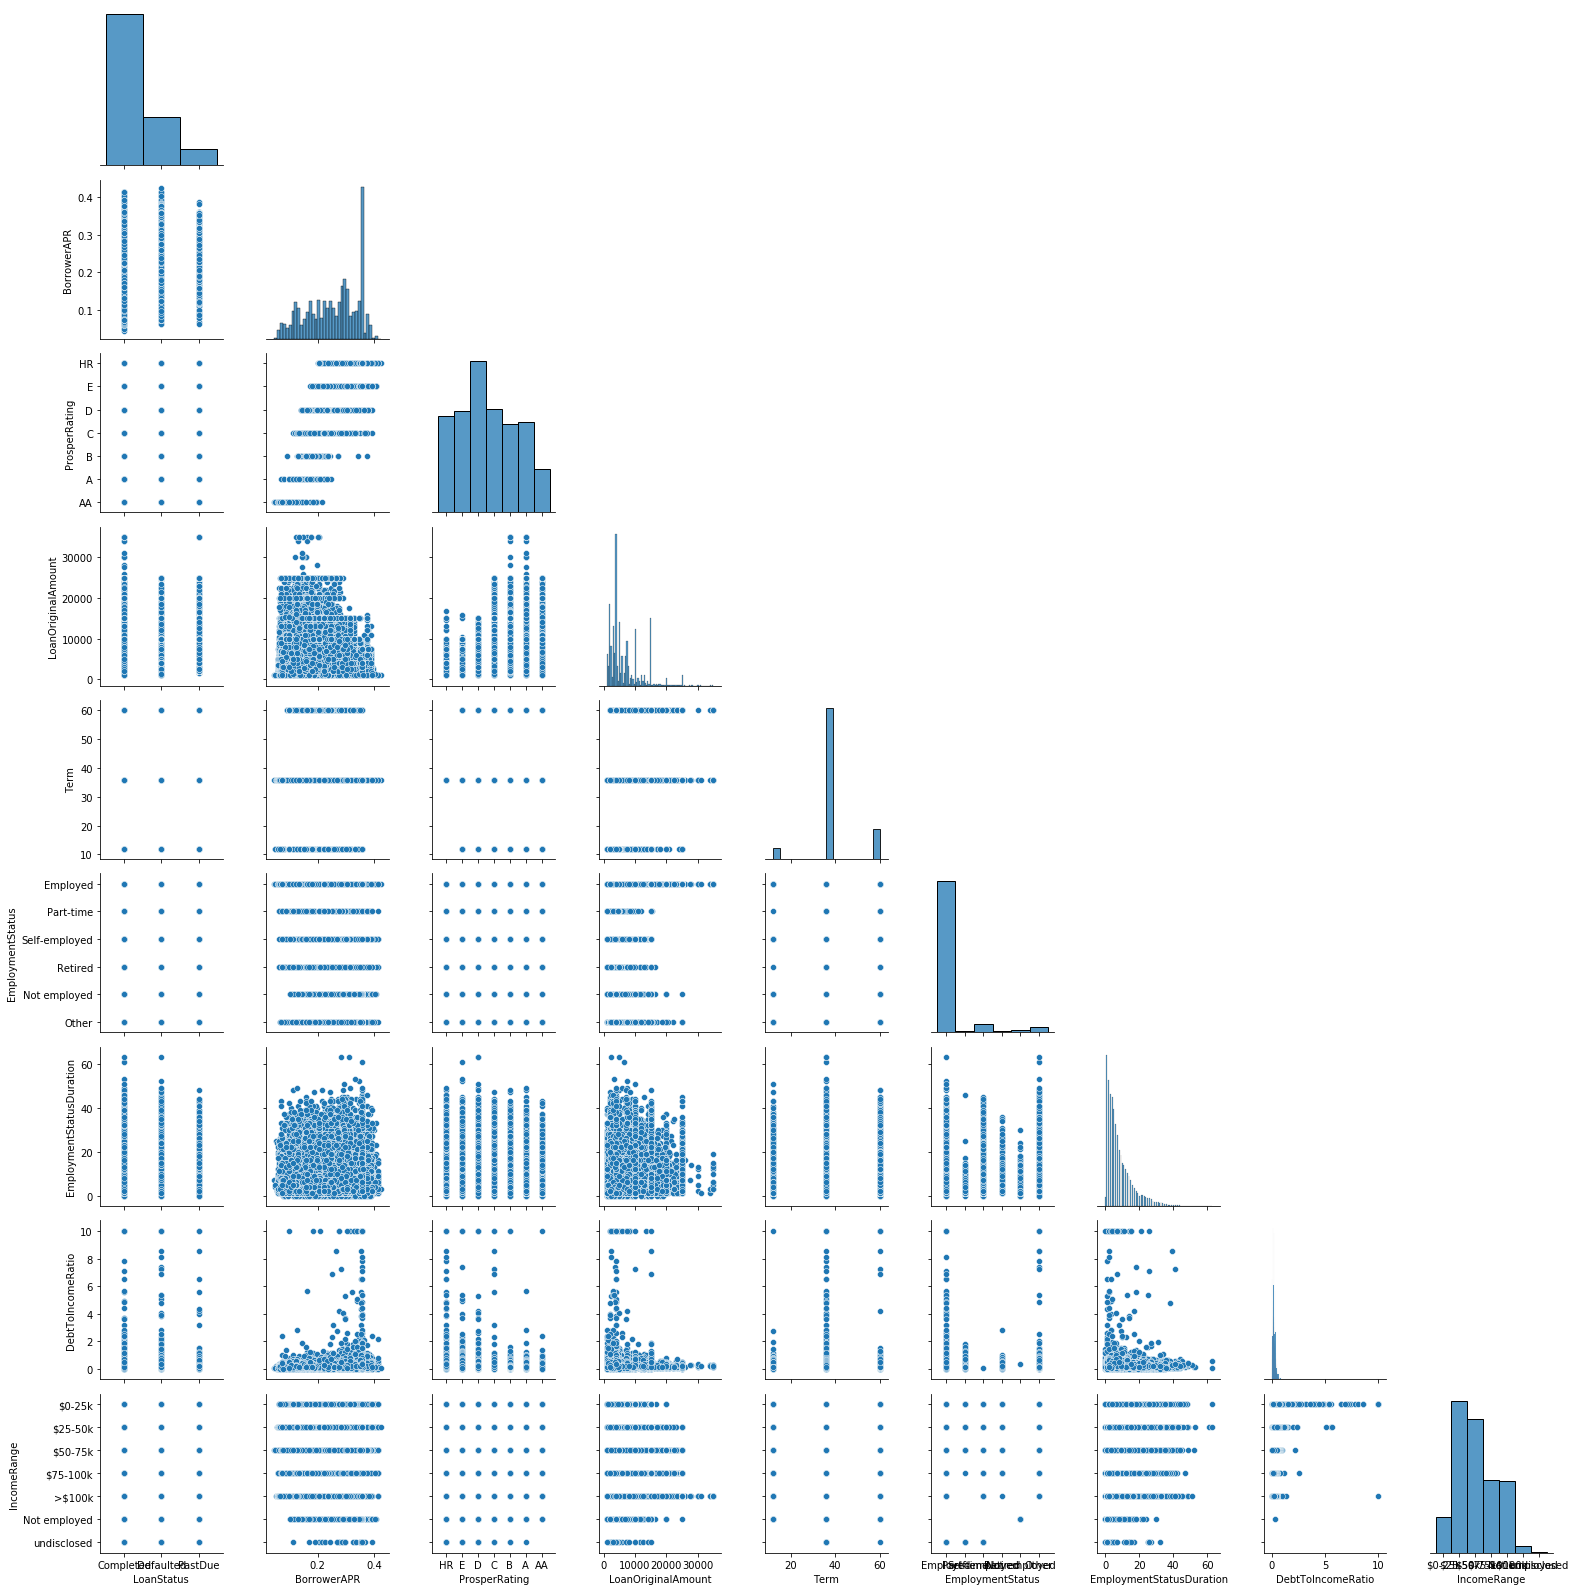

In [49]:
sb.pairplot(
    prosper_df,
    x_vars=['LoanStatus','BorrowerAPR','ProsperRating','LoanOriginalAmount','Term','EmploymentStatus','EmploymentStatusDuration','DebtToIncomeRatio','IncomeRange'],
    y_vars=['LoanStatus','BorrowerAPR','ProsperRating','LoanOriginalAmount','Term','EmploymentStatus','EmploymentStatusDuration','DebtToIncomeRatio','IncomeRange'],
    corner= True
);


The relations on the diagonal were explored during the Uni-variate Exploration.

For the other bi-variate scatter plot relations, we can notice that many of them are against categorical or discrete variables, creating columns or rows of overlapping points. Others are overplotted.
We can deduce a relationship between continuous variables, specially if we excluded the outlier values, for example there is a negative relation between DebtToIncomeRatio against EmploymnetStatusDuration.

Most of the graphs will need treatment or to change type to be able to deduce the relation more clear.

My interest as stated before is to see the variables affecting the **Loan Status**.

*Note 1: I didn't include IsBorrowerHomeowner, because it is binary (True/False) and the data plotted will be difficult to interrupt. By ignoring it the plotting become faster and takes less space.  
Note 2: I only plot half of the matrix plot (corner) is the other have will just reflect the same relation.*

## 2.2 LoanStatus & BorrowerAPR

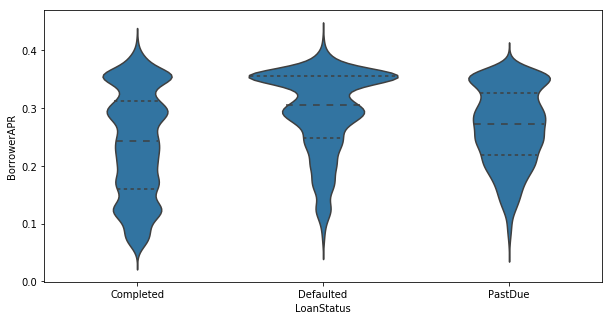

In [50]:
sb.violinplot(data = prosper_df, x = 'LoanStatus', y = 'BorrowerAPR',inner = 'quartile',color = base_color);

After crossing the threshold of APR of 0.3, especially at 0.35, the risk of a loan to default or be delayed is higher compared to lower APRs. Though borrowers who complete their payments cover all rates, but most of them are below 0.32 APR.

APR seems to play a major role in the difficulty of paying back and hence affecting the Loan Status.

## 2.3 LoanStatus & ProsperRating

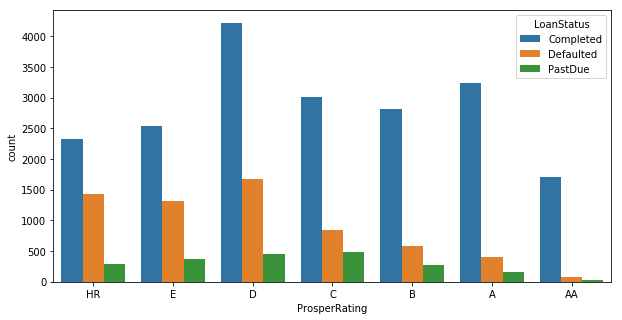

In [51]:
sb.countplot(data = prosper_df, x = 'ProsperRating', hue = 'LoanStatus');

From this graph, we can see that loan status "Completed" is the highest among all the Ratings. The difference is considerable when looking at the highest rating (AA, A, B, C), and the gap become less in the low classes (HR and E).
In general, the gap between Completed and Defaulted decreases when going from a high rate to a low rate, except at  ProsperRating: "D", where the difference between Defaulted and Completed increases. We did see, however, in the distribution of ProsperRating in the Univariate exploration that Rating D has the largest count, and was out of the pattern where the count decrease with higher ratings.

This indicates that ProsperRating gives a good judgment about the risk of the loan, which the main purpose of the ProsperRating.


## 2.4 LoanStatus & LoanOriginalAmount

In [52]:
#creating a series of dicrete values that can be used in the heatmap plot
LoanStatus_num = prosper_df.LoanStatus.replace(['Completed','Defaulted','PastDue'],[0,1,2])

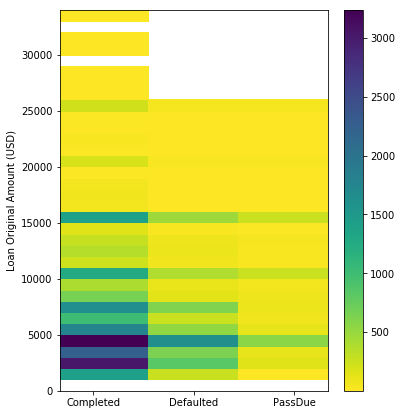

In [53]:
fsize(6,7)
bins_y = np.arange(0, prosper_df.LoanOriginalAmount.max(), 1000)
plt.hist2d(data = prosper_df, x = LoanStatus_num, y = 'LoanOriginalAmount',
          cmap = 'viridis_r',cmin = 1,
          bins=[3,bins_y])
plt.xticks([0.25,1,1.75],['Completed','Defaulted','PassDue'])
plt.ylabel('Loan Original Amount (USD)')
plt.colorbar();

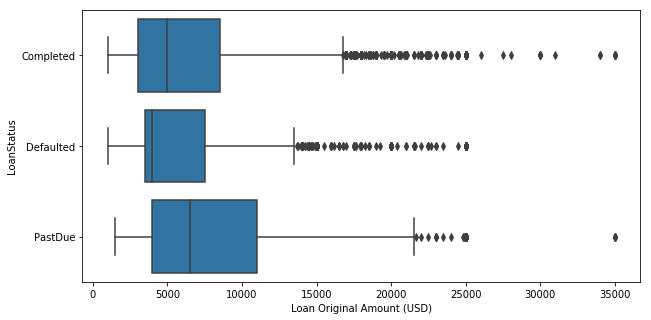

In [54]:
sb.boxplot(data = prosper_df,  x = 'LoanOriginalAmount', y = 'LoanStatus', color = base_color)
plt.xlabel('Loan Original Amount (USD)');

People with small loans are the most who both defaults on and completes their payments. This means the amount of the loan doesn't have a big effect on the loan status for loans less than 15,000.
However, from the heatmap, we can see that between the values corresponding to the median on Defaulted (around \\$3000) and the median of Completed (around \\$5000) the number of defaulted payments is increasing in the population.
Most of the population (the borrowers) are given small loans (below \\$10,000), and no distinguished trend between the 3 loan status is noticed in this population.
In PastDue it seems payment starts to suffer to be in schedule if the loan is above \\$10,000.

My preliminary conclusion is that the Loan Original Amount is a weak predictor of the loan status, as it seems very controlled.

## 2.5 LoanStatus & Term

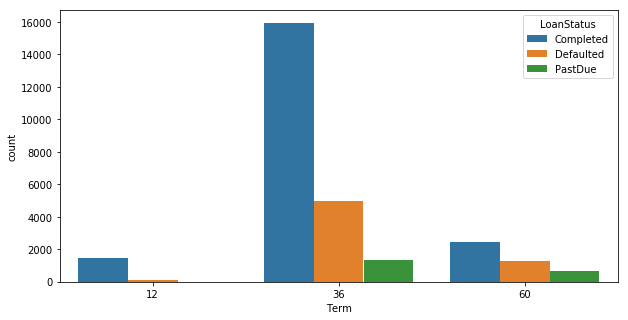

In [55]:
sb.countplot(data = prosper_df, x = 'Term', hue = 'LoanStatus');

The figures show that the shorter the term, the fewer borrowers will default and more will be able to Complete the payments.
Looking at 12-month term, the percentage of the Defaulted loans is very small compared to the Completed.
At 36-month, around third compared to Completed is Defaulted.
While at 60-month more than half Defaulted compared to Completed.

## 2.6 LoanStatus & IsBorrowerHomeowner

C:\Users\hamza\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


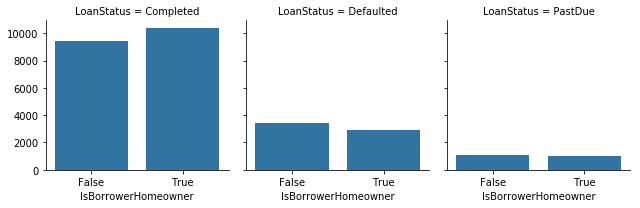

In [56]:
g = sb.FacetGrid(data = prosper_df, col = 'LoanStatus')
g.map(sb.countplot, "IsBorrowerHomeowner");

It is clear from the plots that being a homeowner deosn't affect the chance of Defaulting on the loan.

## 2.7 LoanStatus & EmploymentStatus            

C:\Users\hamza\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


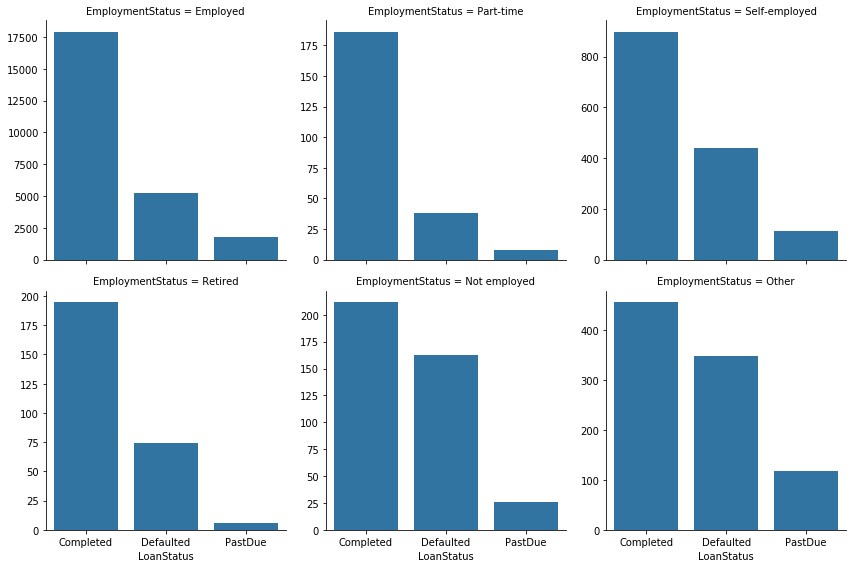

In [57]:
g = sb.FacetGrid(data = prosper_df, col = 'EmploymentStatus',col_wrap = 3,height=4,
                 sharey=False,col_order = employmentstatus_order)
g.map(sb.countplot, 'LoanStatus');

People registered as Not Employed or Other, has the highest chance to Default on payments.
While the status of Employed and Part-time has the least chance of Defaulting.
Retired is the next safe to Complete payment after the Employed and part-timer, even better than Self-Employed.

Employment Status gives an indication about the loan status.

## 2.8 LoanStatus & EmploymentStatusDuration

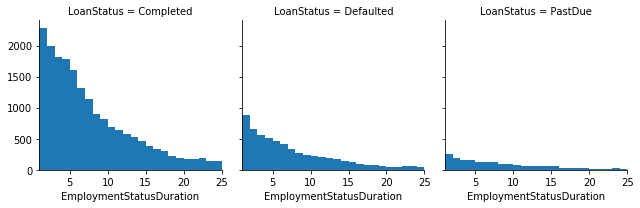

In [58]:
bin_edges = np.arange(0, prosper_df['EmploymentStatusDuration'].max()+1, 1)
g = sb.FacetGrid(data = prosper_df, col = 'LoanStatus',xlim=(1,25))
g.map(plt.hist, 'EmploymentStatusDuration',bins=bin_edges);

In [59]:
filt = (prosper_df['EmploymentStatusDuration']<=10) & (prosper_df['EmploymentStatusDuration']>0)
employee_less_than_10_df = prosper_df[filt]

C:\Users\hamza\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


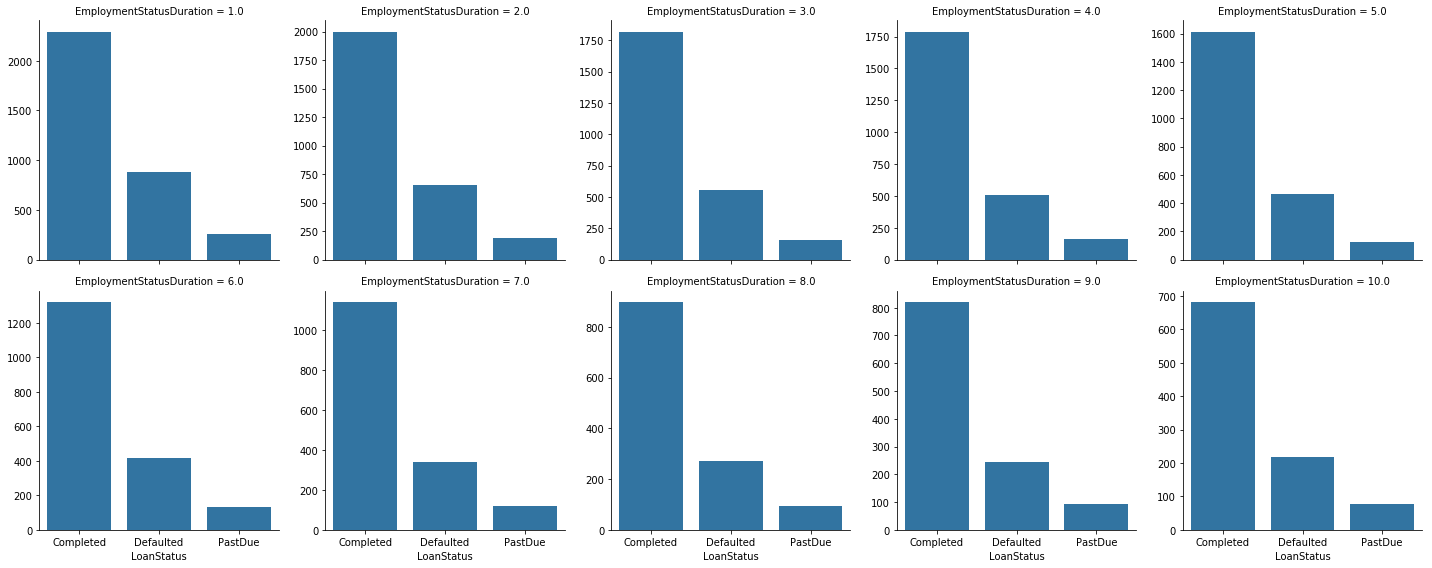

In [60]:
g = sb.FacetGrid(data = employee_less_than_10_df, col = 'EmploymentStatusDuration',col_wrap = 5,height=4,sharey=False)
g.map(sb.countplot, 'LoanStatus');

From the first graph, the histogram, it is evident that with more employment duration, the rate across all loan status becomes less. I believe this might be related to the number of borrowers decreases with time. It might indicate better income that they don't need loans, or that there are other options available to them, or other situations.

In the second graph, bar chart, I am looking at the first ten years of employment duration, as they represent the majority of the population. I look at each work experience level and see the comparison between all statuses, especially Defaulted and Completed. 

It doesn't appear to me that the Employment Status Duration is affecting the loan status. This is consistent with the first graph where we saw both distributions are decreasing with time.

## 2.9 LoanStatus & DebtToIncomeRatio

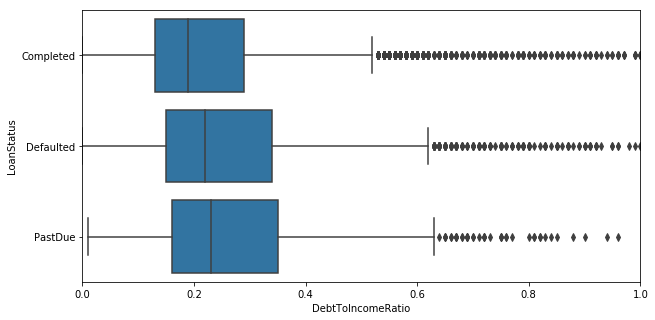

In [61]:
sb.boxplot(data = prosper_df,  x = 'DebtToIncomeRatio', y = 'LoanStatus', color = base_color)
plt.xlim(0,1);

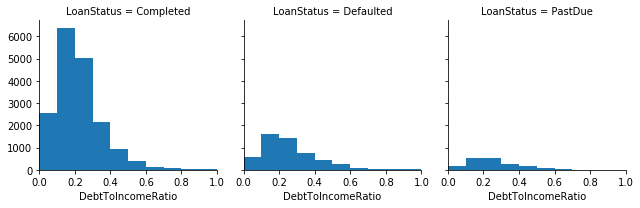

In [62]:
bin_edges = np.arange(0, prosper_df['DebtToIncomeRatio'].max()+0.1, 0.1)
g = sb.FacetGrid(data = prosper_df, col = 'LoanStatus',xlim=(0,1))
g.map(plt.hist, 'DebtToIncomeRatio',bins=bin_edges);

The different loan status are following same pattern with the change of the Debt to Income Ratio.

The indicate a weak relation between it and the predicting the loan status.

## 2.10 LoanStatus & IncomeRange

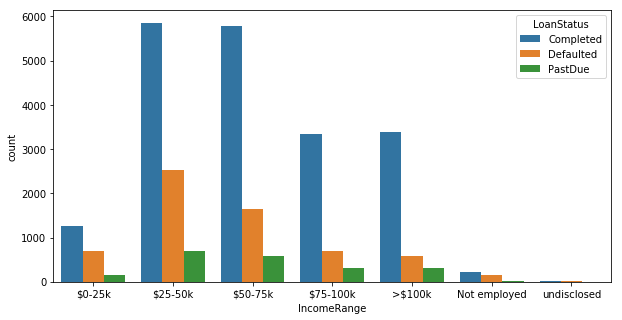

In [63]:
sb.countplot(data = prosper_df, x = 'IncomeRange', hue = 'LoanStatus',
             order = incomeRange_order);


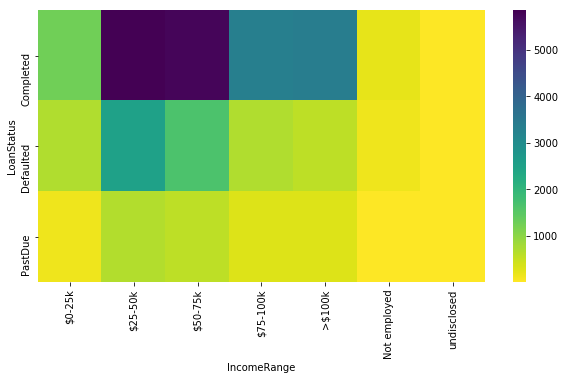

In [64]:
sb.heatmap(summary('IncomeRange','LoanStatus'),cmap = 'viridis_r');

- From \\$0-25K there is a high risk of defaulting, as the ration between defaulting and completed is around 1:2.
- For \\$25-75 the risk of defaulting is moderate and decreasing with higher income.
- After \\$75k a threshold is crossed. In these high-income ranges > \\$75k, the ratio of people defaulting is small. Low risk.
- Not-employed Income Range: nearly the same number of borrowers are Defaulting compared to the number of Completed. High risk.

In general, the Defaulting chance decrease and the Completed chance increase the higher the income is.


## 2.11 Summary the of Bivariate Exploration

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The Loan Status varied clearly with the BorroweAPR, showing, as expected bigger chance for defaulting with higher rates.

Also, there is a clear relation between ProsperRating and Loan Status; the better the rating the less change to default. ProsperRating is an indicator of loan risk. The graph shows that it is doing a good job of predicting which loans are riskier.

For Term most borrowers are approved for 36 months (3 years), it seems a small number is applying, or agreeing, to take the 12 months, while a small population of borrowers is approved for 60 months (5 years). The graph indicates that the longer the term, the more chance the borrower will default; however this conclusion needs more tests given the small population for 12 and 60 months.

The following features I believe are the strongest in predicting the status of the loan: **BorrowerAPR, ProsperRating, EmploymentStatus, IncomeRange**

____________

# 3.0 Multivariate Exploration

## 3.1 BorrowerAPR vs. LoanOriginalAmount. Shape: LoanStatus

Text(0, 0.5, 'LoanOriginalAmount (USD)')

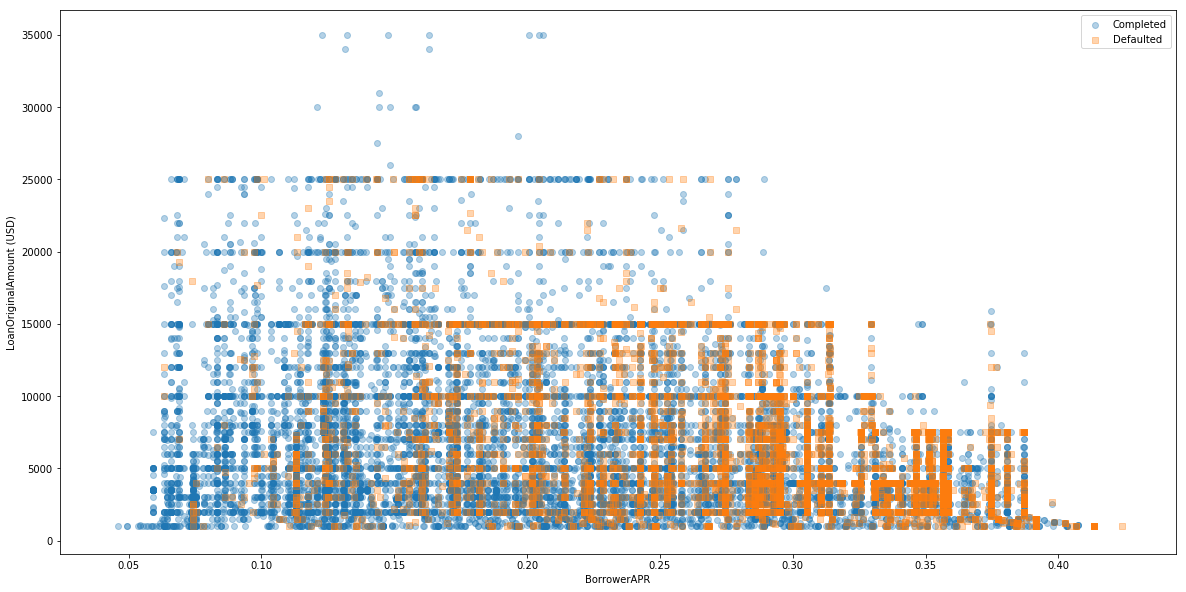

In [65]:
#BorrowerAPR, LoanOriginalAmount, shape: LoanStatus
fsize(20,10)
cat_markers = [['Completed', 'o'],
               ['Defaulted', 's']]

for cat, marker in cat_markers:
    df_cat = prosper_df[prosper_df['LoanStatus'] == cat]
    plt.scatter(data = df_cat, x = 'BorrowerAPR', y = 'LoanOriginalAmount',  marker = marker,alpha=1/3)
plt.legend(['Completed','Defaulted'])
plt.xlabel('BorrowerAPR')
plt.ylabel('LoanOriginalAmount (USD)')

The graph is a scatter plot between Borrower APR and Loan Original Amount (USD), with dots has different shapes and color according following Loan Status.
The PastDue Loan Status were not consider, to make the graph easier to read and conclude a relation from it.

The graph shows the higher the APR, the more chance there is for the Loan Status to default, as the orange squares density increase with higher APR.
We can observe also that above \\$15,000 the loan status is mostly Completed at all values of available APR at that level.

## 3.2  EmploymentStatus vs. IncomeRange. hue: LoanStatus

C:\Users\hamza\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


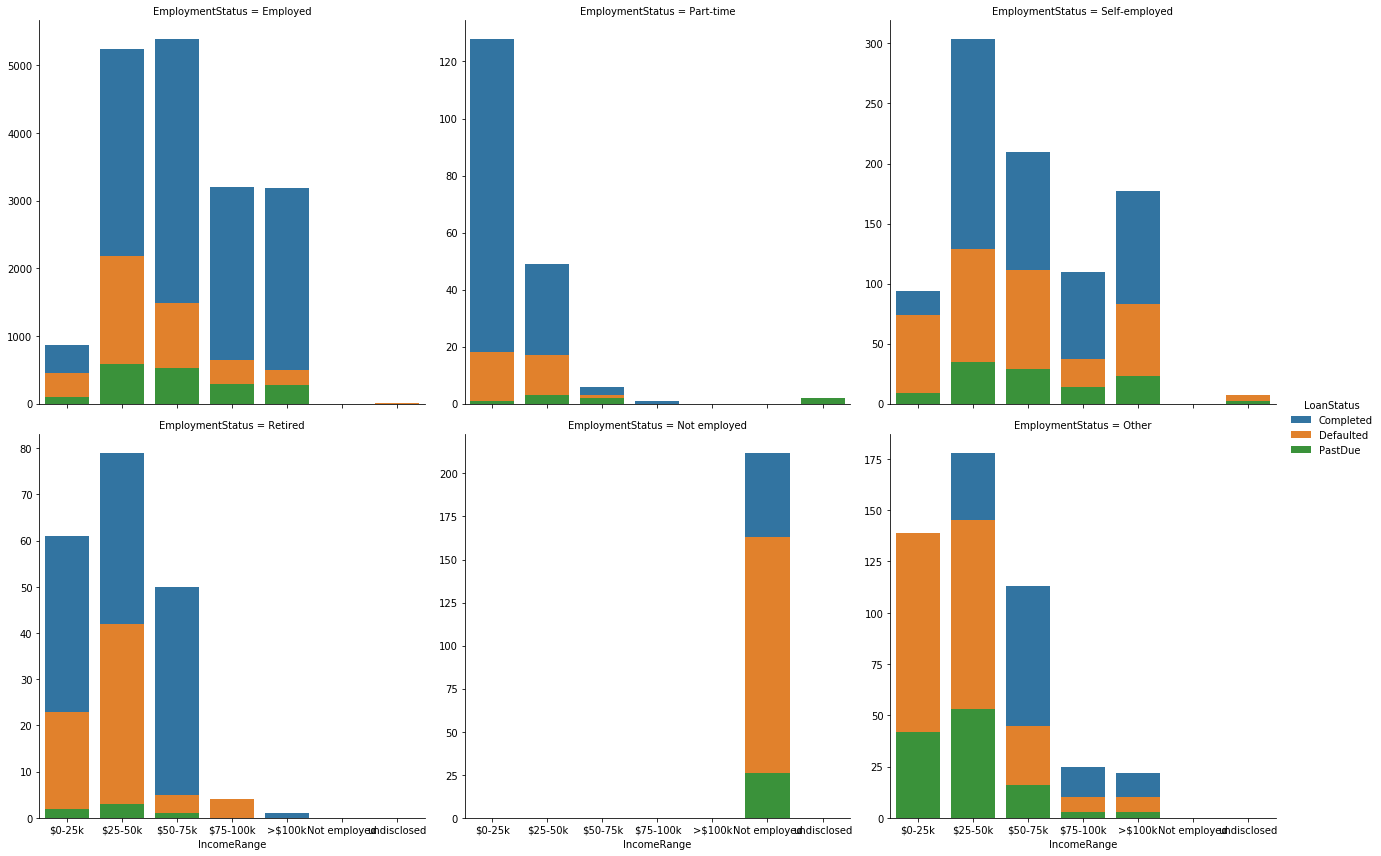

In [66]:
#Loan Status vs. Income Range hue: Employment Status
g = sb.FacetGrid(data = prosper_df, col = 'EmploymentStatus',col_wrap = 3,height=6,
                 sharey=False,hue='LoanStatus')
g.map(sb.countplot,'IncomeRange')
g.add_legend();

The graph is faceting each Employment Status and plot Income Range frequencies for each. The bars are colored to show the share of each Loan Status.

For "Employed Status", the conclusion follows the general description of the Income Range count plot for 2.10.

"Part Time" status shows that the high-income population is nearly not present, and for the low range of \\$0-25k, the defaulting ratio is small, but increase on the more common income range of \\$25-50k.

Looking at  "Self-employed", the risk to default for low compared to all other Employment Status, is the highest. The defaulted ratio is higher in all income levels compared to the last two Employment Status.

The population of "Retired" is small. The represented population has a very high default chance if their income range is high, which is unexpected. We can see in contrast that the Completed cases in the range \\50-75k is very high. Low income represents nearly a 50-50 chance.

For the "Not employed" and "other"; the defaulted risk, in total, is the highest, especially when looking at low incomes <\\50k.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Plot 3.1: The scatter draws a threshold online at 15k, like a ceiling, that shows that most of the loans are below this line. Looking above the line you see how most of the cases are Completed which was a new insight.
LoanOrginalAmount gave signals during Bivariate Exploring to be a weak predictor for Loan Status, but this graph gives it another light.


### Were there any interesting or surprising interactions between features? 
Plot 3.2: I was surprised to see that Part-Time Employment Status mainly existed at low income. I thought they will follow the Employed distribution. Nearly on all Employment Status, borrowers with income lower than \\25,000 are high risk.

In [67]:
prosper_df.to_csv('prosperExtract.csv', index=False)